## PROCESSAMENTO DOS DADOS

In [1]:
''' Importando Bibliotecas Necessárias '''
import os # Para listar arquivos
import pandas as pd # Manipulação de dados
import numpy as np # Operações com vetores
from tqdm import tqdm # Analisar tempo de execução de loops

#### Iremos analisar a distribuição da movimentação de pessoas dentro de todas as estações do metrô de NYC presentes na base de dados e apresentaremos uma análise em cima da estação que obtiver a maior movimentação de pessoas no período analisado (2010-2017). E, como existe a possibilidade de auditoria das catracas que durem mais de 4 horas, iremos realizar a análise DIARIAMENTE.

#### Sendo assim, a nossa série temporal analisada será:
- A estação utilizada: a mais movimentada da base de dados.
- O período de tempo analisado será diariamente.
- A variável de movimentação de pessoas na estação será criada a partir da soma das variáveis já existentes: Entries e Exits.

In [2]:
files = os.listdir('files/') #listando os arquivos contidos dentro da pasta FILES

df = pd.DataFrame() # Data Frame utilizado para verificar as estações mais 
                    # movimentadas em todo tempo analisado

for i in tqdm(files): # Loop para incrementar o DF citado acima
    df_aux = pd.read_csv('files/'+i) #lendo arquivos
    df_aux = df_aux[(df_aux['desc'] == 'REGULAR') | (df_aux['desc'] == 'RECOVR')] #filtro de evento de auditoria REGULAR ou RECUPERADA
    df_aux['sum_entries_exits'] = df_aux['entries'] + df_aux['exits'] #criando variável de MOVIMENTAÇÃO DE PESSOAS na estação
    df_aux = df_aux.groupby('station').sum().sort_values('sum_entries_exits',ascending=False) #somando a quantidade de movimentação de pessoas por estação em cada ano
    df = df.append(df_aux) #incrementando ano a ano

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]<ipython-input-2-7fa5c2e9c9d0>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_aux = df_aux.groupby('station').sum().sort_values('sum_entries_exits',ascending=False) #somando a quantidade de movimentação de pessoas por estação em cada ano
<ipython-input-2-7fa5c2e9c9d0>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_aux) #incrementando ano a ano
 12%|██████████▌                                                                         | 1/8 [00:13<01:36, 13.80s/it]<ipython-input-2-7fa5c2e9c9d0>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum 

In [3]:
df

,entries,exits,sum_entries_exits
station,,,
34 ST-PENN STA,6.482114e+11,5.413518e+11,1.189563e+12
42 ST-TIMES SQ,2.832235e+11,6.953192e+11,9.785427e+11
42 ST-GRD CNTRL,5.123394e+11,4.532522e+11,9.655916e+11
86 ST,4.540535e+11,4.624322e+11,9.164856e+11
34 ST-HERALD SQ,4.270742e+11,4.470248e+11,8.740990e+11
...,...,...,...
JFK JAMAICA CT1,1.481682e+09,1.340244e+09,2.821926e+09
BROAD CHANNEL,1.978553e+09,2.875802e+08,2.266133e+09
PATH WTC 2,2.119286e+08,6.234978e+08,8.354264e+08


In [3]:
''' Estações com maior movimentação em todos os anos analisados '''
df.groupby('station').sum().sort_values('sum_entries_exits',ascending=False)

,entries,exits,sum_entries_exits
station,,,
23 ST,3.331290e+13,3.104343e+13,6.435633e+13
125 ST,3.881683e+13,2.234160e+13,6.115843e+13
CHAMBERS ST,3.003098e+13,2.626972e+13,5.630071e+13
CANAL ST,3.044029e+13,2.575558e+13,5.619587e+13
42 ST-PORT AUTH,3.009592e+13,2.448473e+13,5.458065e+13
...,...,...,...
ORCHARD BEACH,2.957742e+09,1.645059e+08,3.122247e+09
LGA AIRPORT CTB,2.194351e+08,5.004872e+07,2.694838e+08
CENTRAL AVE,-4.462136e+10,-4.569287e+10,-9.031423e+10


#### Como podemos notar, a estação com maior movimentação foi a estação 23 ST.

In [34]:
''' Criação do DataFrame da estação que será utilizada '''

station = '23 ST' #definindo a estação

df_station = pd.DataFrame() # df da estação

for i in tqdm(files): # Loop para incrementar o DF citado acima
    df_aux = pd.read_csv('files/'+i) #lendo arquivos
    df_aux = df_aux[((df_aux['desc'] == 'REGULAR') | (df_aux['desc'] == 'RECOVR')) &
                    (df_aux['station'] == station)] # filtro de auditorias regulares ou recuperadas e estação.
    df_aux['sum_entries_exits'] = df_aux['entries'] + df_aux['exits'] #criando variável de MOVIMENTAÇÃO DE PESSOAS na estação
    df_aux.index = pd.to_datetime(df_aux['time'].apply(lambda x: x[:10])) # transformando index para formato datetime considerando só DIAS
    df_station = df_station.append(df_aux.drop('time',axis=1)) # incrementando ano a ano

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]<ipython-input-34-088e9cd21ff9>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_station = df_station.append(df_aux.drop('time',axis=1)) # incrementando ano a ano
 12%|██████████▌                                                                         | 1/8 [00:13<01:31, 13.13s/it]<ipython-input-34-088e9cd21ff9>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_station = df_station.append(df_aux.drop('time',axis=1)) # incrementando ano a ano
 25%|█████████████████████                                                               | 2/8 [00:35<01:51, 18.64s/it]<ipython-input-34-088e9cd21ff9>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

#### Iremos verificar a distribuição da movimentação de pessoas na estação 23 ST em cada uma das linhas presentes nesta estação.

In [35]:
'''DF para distribuição da movimentação de pessoas por linha e por dias'''
df_linename = df_station.groupby(['linename','time']).sum()

<ipython-input-35-3e804094423b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_linename = df_station.groupby(['linename','time']).sum()


<IPython.core.display.Javascript object>


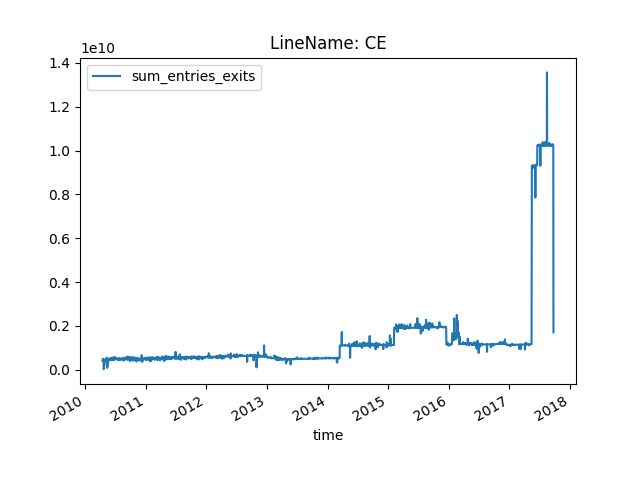

<IPython.core.display.Javascript object>


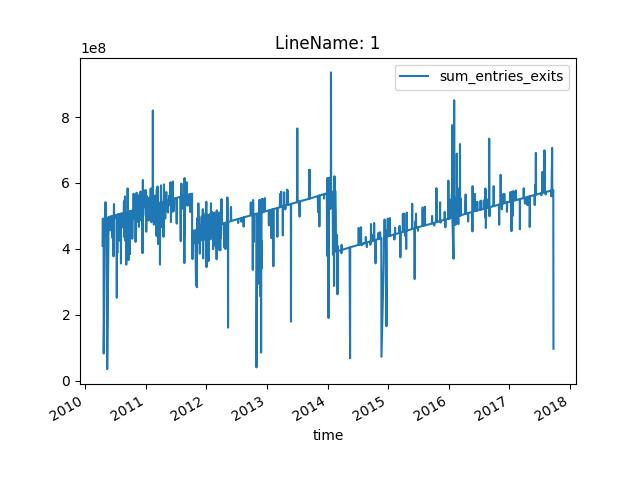

<IPython.core.display.Javascript object>


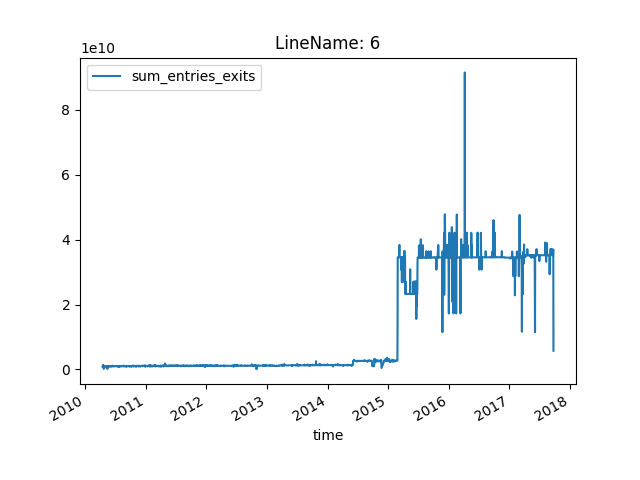

<IPython.core.display.Javascript object>


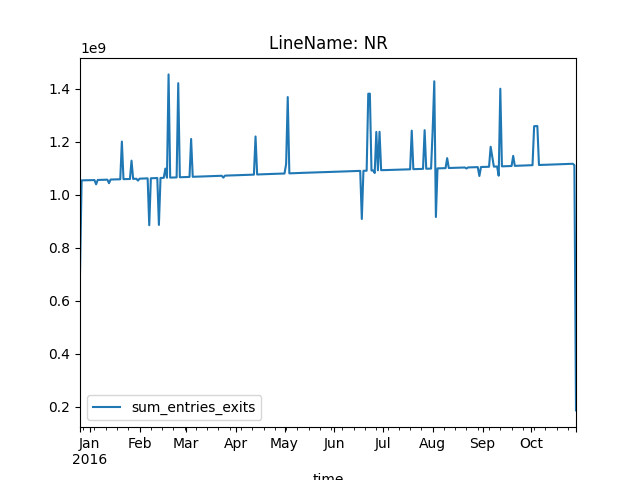

<IPython.core.display.Javascript object>


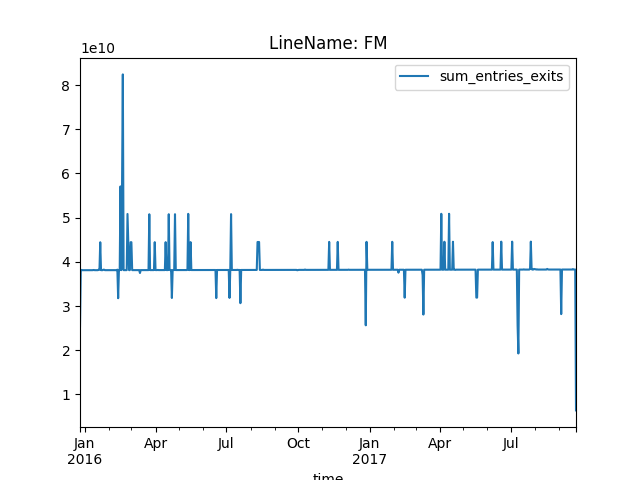

<IPython.core.display.Javascript object>


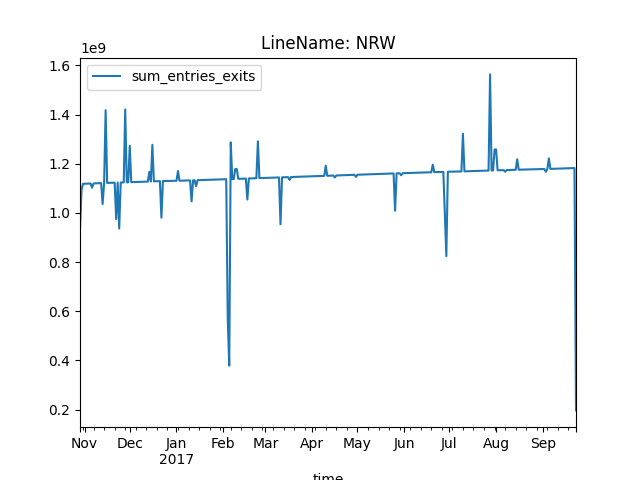

In [36]:
''' Visualização das séries temporais das linhas da estação '''
%matplotlib notebook
for i in df_station.linename.unique(): 
    df_linename.xs(i)[['sum_entries_exits']].plot(title= f'LineName: {i}')

#### Só iremos utilizar as linhas de metrô que possuem dados de 2010 a 2017:
- Linhas: 1, 6 e CE

In [37]:
'''
DF station apenas com as linhas de metrô (1,6,CE) que contém dados de 2010 a 2017,
apenas com a variável sum_entries_exits
'''
df_station = df_station[df_station['linename'].isin(['1','6','CE'])].groupby('time').sum()[['sum_entries_exits']]

<ipython-input-37-c6f5cc1eb361>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_station = df_station[df_station['linename'].isin(['1','6','CE'])].groupby('time').sum()[['sum_entries_exits']]


In [38]:
df_station

,sum_entries_exits
time,
2010-04-17,1.656766e+09
2010-04-18,1.988478e+09
2010-04-19,1.988856e+09
2010-04-20,1.989613e+09
2010-04-21,2.314462e+09
...,...
2017-09-19,4.601220e+10
2017-09-20,4.604301e+10
2017-09-21,4.609837e+10


# CRIANDO FEATURES

#### Iremos criar algumas features de tempo para utilizarmos no modelo de regressão

In [39]:
df_station['year'] = df_station.index.year # Feature de ANO
df_station['quarter'] = df_station.index.quarter # Feature de QUADRIMESTRE
df_station['month'] = df_station.index.month # Feature de MÊS
df_station['day_of_week'] = df_station.index.dayofweek # Feature de DIA DA SEMANA
df_station['day_of_year'] = df_station.index.dayofyear # Feature de DIA DO ANO

In [40]:
df_station.head()

,sum_entries_exits,year,quarter,month,day_of_week,day_of_year
time,,,,,,
2010-04-17,1.656766e+09,2010,2,4,5,107
2010-04-18,1.988478e+09,2010,2,4,6,108
2010-04-19,1.988856e+09,2010,2,4,0,109
2010-04-20,1.989613e+09,2010,2,4,1,110
2010-04-21,2.314462e+09,2010,2,4,2,111


#### Será que existe alguma relação das features que acabamos de criar com a nossa variável dependente ?

In [41]:
import seaborn as sns # Utilizada para visualização dos BoxPlots

<IPython.core.display.Javascript object>


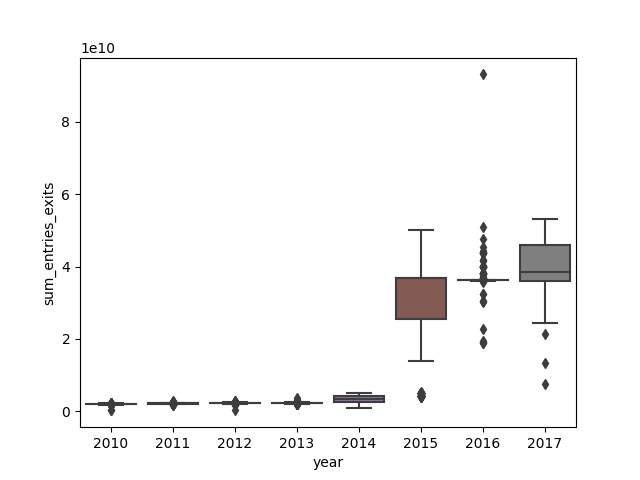

<AxesSubplot:xlabel='year', ylabel='sum_entries_exits'>

In [42]:
''' Gráfico BOX-PLOT da variável ANO com a variável SUM_ENTRIES_EXITS '''
%matplotlib notebook
sns.boxplot(data=df_station,x='year',y='sum_entries_exits')

<IPython.core.display.Javascript object>


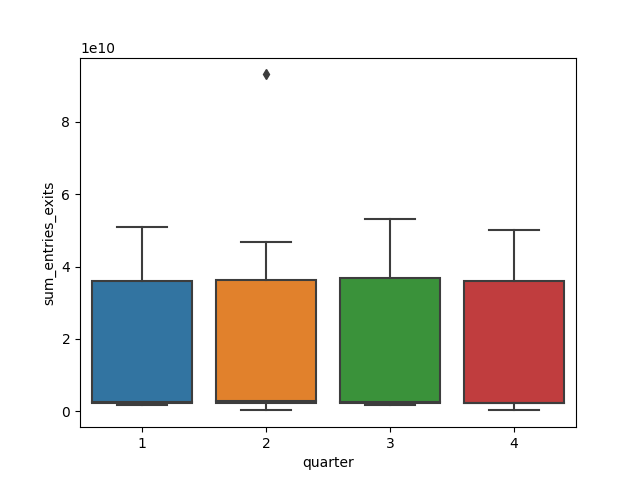

<AxesSubplot:xlabel='quarter', ylabel='sum_entries_exits'>

In [43]:
''' Gráfico BOX-PLOT da variável QUADRIMESTRE com a variável SUM_ENTRIES_EXITS '''
%matplotlib notebook 
sns.boxplot(data=df_station,x='quarter',y='sum_entries_exits')

<IPython.core.display.Javascript object>


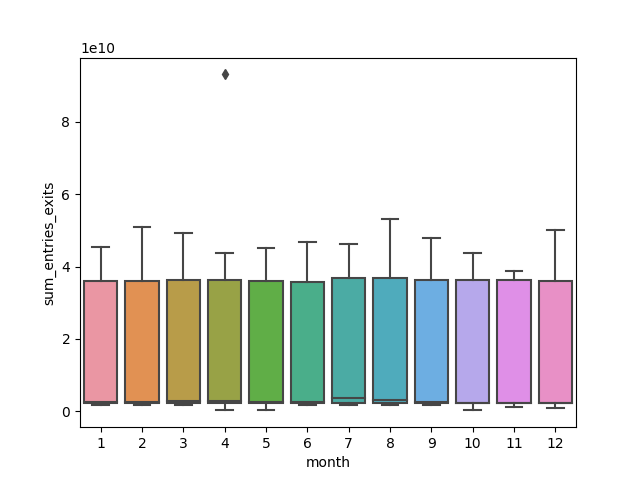

<AxesSubplot:xlabel='month', ylabel='sum_entries_exits'>

In [44]:
''' Gráfico BOX-PLOT da variável MÊS com a variável SUM_ENTRIES_EXITS '''
%matplotlib notebook 
sns.boxplot(data=df_station,x='month',y='sum_entries_exits')

<IPython.core.display.Javascript object>


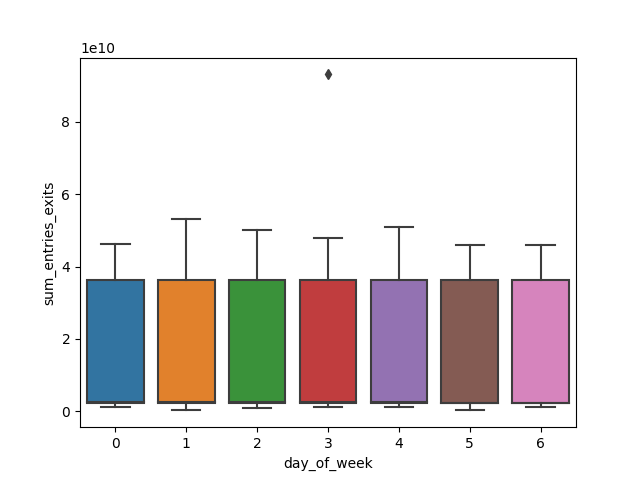

<AxesSubplot:xlabel='day_of_week', ylabel='sum_entries_exits'>

In [45]:
''' Gráfico BOX-PLOT da variável DIA-DA-SEMANA com a variável SUM_ENTRIES_EXITS '''
%matplotlib notebook 
sns.boxplot(data=df_station,x='day_of_week',y='sum_entries_exits')

<IPython.core.display.Javascript object>


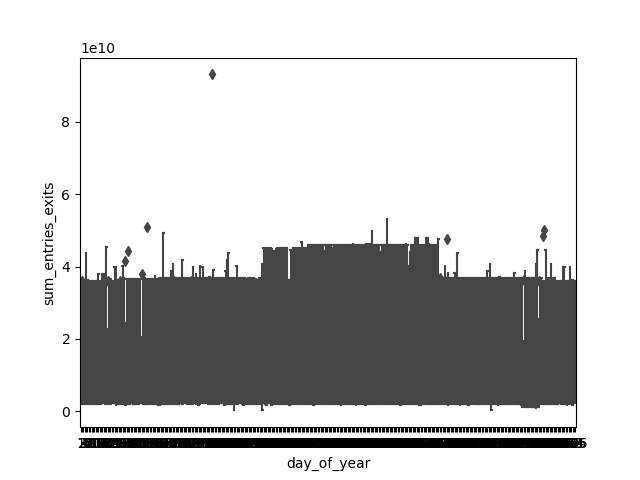

<AxesSubplot:xlabel='day_of_year', ylabel='sum_entries_exits'>

In [46]:
''' Gráfico BOX-PLOT da variável DIA-DO-ANO com a variável SUM_ENTRIES_EXITS '''
%matplotlib notebook 
sns.boxplot(data=df_station,x='day_of_year',y='sum_entries_exits')

#### De acordo com a distribuição das novas features com a nossa variável dependente, apresentadas nos Box-Plots acima, podemos ver que existe uma diferença maior entre as variáveis YEAR e DAY_OF_YEAR com a variável SUM_ENTRIES_EXITS, nos dando indícios que essas sejam as variáveis mais importantes a serem consideradas para previsão do evento analisado.

# MODELAGEM

In [17]:
import xgboost as xgb # Necessária para utilizar o algoritmo XGBoost
from sklearn.ensemble import RandomForestRegressor # Necessária para utilizar o algoritmo RandomForestRegressor
from sklearn.metrics import mean_squared_error # A métrica de avaliação dos modelos
from sklearn.model_selection import TimeSeriesSplit # Divisão dos dados de Treino/Validação no modelo de Séries Temporais

### SEPARAÇÃO DOS DADOS

In [18]:
'''
Separação dos dados em TREINO e TESTE:
- Serão utilizados 7,5% da base inteira como base de teste,
representando aproximadamente 6,5 meses (200 dias).
- Porcentagem acima foi definida pensando na validação estatística dos modelos criados.
'''

X_train = df_station[:-200].drop('sum_entries_exits',axis=1)
y_train = df_station[:-200].sum_entries_exits

X_test = df_station.iloc[-200:].drop('sum_entries_exits',axis=1)
y_test = df_station.iloc[-200:].sum_entries_exits

### CROSS-VALIDATION

In [19]:
'''
Processo de Cross-Validation dos modelos:
- Será utilizada a base de TREINO (X_train e y_train).
- O número de folds utilizado foi 10, pensando na validação estatística.
- O conjunto de validação foi definido com o mesmo tamanho do conjunto de teste (200 dias).
- Os algoritmos utilizados foram: XGBoost e RandomForest, ambos como regressores. Esses algoritmos
foram pensados pois ambos possuem internamente cálculo para importância das features, tendo como maior 
diferença entre eles o modo como o ensemble é criado, uma vez que o XGBoost utiliza a técnica BOOSTING
(técnica de reamostragem de features) para criação de seus estimadores, já o RandomForest utiliza
a técnica BAGGING (técninca de reamostragem de amostras) para criação de seus estimadores.
- A métrica utilizada para validação dos modelos foi RMSE (root mean squared error) pensando 
na avaliação dos modelos na mesma unidade que nossa variável dependente, além da vantagem de 
penalizar modelos com maiores diferenças entre valores preditos e os valores reais.
- Parâmetro do número de estimadores de ambos os ensembles (XGBoost e RF) foi setado em 1000 apenas para
padronização, nenhum tuning foi realizado neste parâmetro.
'''


cross_val_time_series = TimeSeriesSplit(n_splits=10, test_size=200) # definindo método de Cross-Validation

scores_xgb = [] # vetor de scores (RMSE) do xgboost
scores_rf = [] # vetor de scores (RMSE) do rf

for train_idx, val_idx in tqdm(cross_val_time_series.split(X_train)): # loop para Cross-Validation em cada FOLD
    
    X_train_aux = X_train.iloc[train_idx] # Conjunto de Treino em cada fold
    y_train_aux = y_train.iloc[train_idx] # Target de Treino em cada fold
    X_val = X_train.iloc[val_idx] # Conjunto Validação em cada fold
    y_val = y_train.iloc[val_idx] # Conjuto Validação em cada fold
    
    xgboost_regressor = xgb.XGBRegressor(n_estimators=1000) # Definição do modelo XGBoost
    rf_regressor = RandomForestRegressor(n_estimators=1000) # Definição do modelo RF
    
    xgboost_regressor.fit(X_train_aux, y_train_aux) # Treinando o XGBoost
    rf_regressor.fit(X_train_aux,y_train_aux) # Treinando o RF
    
    y_pred_xgb = xgboost_regressor.predict(X_val) # Valores preditos pelo XGBoost
    y_pred_rf = rf_regressor.predict(X_val) # Valores preditos pelo RF
    
    scores_xgb.append(np.sqrt(mean_squared_error(y_val, y_pred_xgb))) # Score (RMSE) do XGBoost 
    scores_rf.append(np.sqrt(mean_squared_error(y_val, y_pred_rf))) # Score (RMSE) do RF

10it [01:02,  6.25s/it]


### Colaborando com nossas análises prévias, ambos os modelos identificaram as novas features YEAR e DAY_OF_YEAR como sendo as mais importantes para realização da previsão da nossa variável SUM_ENTRIES_EXITS

#### Feature Importance:

- XGBoost:

In [20]:
pd.DataFrame([xgboost_regressor.feature_importances_], columns=xgboost_regressor.feature_names_in_)

,year,quarter,month,day_of_week,day_of_year
0,0.954652,0.000334,0.002238,0.001963,0.040813


- Random Forest:

In [21]:
pd.DataFrame([rf_regressor.feature_importances_],columns=rf_regressor.feature_names_in_)

,year,quarter,month,day_of_week,day_of_year
0,0.926334,0.000901,0.001856,0.001886,0.069023


# VALIDAÇÃO ESTATÍSTICA

### Existe diferença estatisticamente significativa entre a performace dos dois modelos utilizados?

In [22]:
from scipy.stats import kstest, shapiro # Teste de Normalidade dos vetores de performace dos modelos

#### Utilizaremos dois testes de Normalidade da distribuição dos vetores:
- Kolmogorov-Smirnov: Se p-valor < 0.05 (nível de significância do teste), rejeitamos a hipótese nula de que a distribuição do vetor analisado segue uma distribuição normal.
- Shapiro-Wilk: Se p-valor < 0.05 (nível de significância do teste), rejeitamos a hipótese nula de que a distribuição do vetor analisado segue uma distribuição normal.

#### Utilizamos esses dois testes para garantirmos se utilizaremos testes PARAMÉTRICOS ou NÃO-PARAMÉTRICOS para calcularmos a diferença estatística entre a performace dos dois modelos.

- XGBoost:

In [23]:
kstest(scores_xgb,'norm'),shapiro(scores_xgb)

(KstestResult(statistic=1.0, pvalue=0.0),
 ShapiroResult(statistic=0.709978461265564, pvalue=0.001163910492323339))

- Random Forest:

In [24]:
kstest(scores_rf,'norm'),shapiro(scores_rf)

(KstestResult(statistic=1.0, pvalue=0.0),
 ShapiroResult(statistic=0.7060673832893372, pvalue=0.0010434709256514907))

#### Como em ambos os testes nós rejeitamos a hipótese que a distribuição dos vetores de performace dos modelos se distribuem de acordo com a distribuição NORMAL, utilizaremos teste NÃO-PARAMÉTRICO para comparação das performances dos modelos.

#### Utilizaremos o teste de Wilcoxon:
- Wilcoxon: Se p-valor < 0.05 (nível de significância do teste), rejeitamos a hipótese nula de que x - y = 0, ou seja, que os vetores vem da mesma distribuição.

In [25]:
from scipy.stats import wilcoxon # Teste não-paramétrico para comparação da performace dos modelos

In [26]:
wilcoxon(scores_xgb,scores_rf) # não rejeita a hipotese que os vetores vêm da mesma distribuição

WilcoxonResult(statistic=16.0, pvalue=0.275390625)

#### Como verificamos, pelo teste de Wilcoxon, não existe diferença estatisticamente significativa entre a performace dos modelos utilizados, iremos analisar a performace de ambos na previsão das amostras do conjunto de teste.

# PREVISÃO DA BASE DE TESTE

In [27]:
xgboost_regressor = xgb.XGBRegressor(n_estimators=1000) # Definindo XGBoost
rf_regressor = RandomForestRegressor(n_estimators=1000) # Definindo RF

xgboost_regressor.fit(X_train, y_train) # Treinando XGBoost em toda base de TREINO
rf_regressor.fit(X_train, y_train) # Treinando RF em toda base de TREINO

y_pred_xgb = xgboost_regressor.predict(X_test) # Valores preditos por XGBoost da base de TESTE
y_pred_rf = rf_regressor.predict(X_test) # Valores preditos por RF da base de TESTE    

In [28]:
''' Criação do DF de comparação entre as performaces dos modelos e o valor real da variável dependente'''

df_comparison = pd.DataFrame([y_test.values,y_pred_xgb,y_pred_rf]).T
df_comparison.columns = ['y_test','y_pred_xgb','y_pred_rf']
df_comparison.index = y_test.index
df_comparison.head()

,y_test,y_pred_xgb,y_pred_rf
time,,,
2017-03-08,3.595427e+10,3.618235e+10,3.677736e+10
2017-03-09,3.626309e+10,3.727056e+10,3.727766e+10
2017-03-10,3.638125e+10,3.819025e+10,3.707745e+10
2017-03-11,3.642593e+10,2.566721e+10,3.029937e+10
2017-03-12,3.672872e+10,2.161310e+10,2.947915e+10


<IPython.core.display.Javascript object>


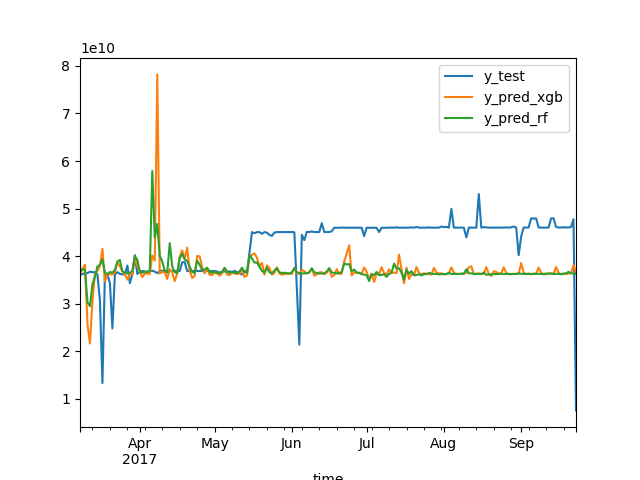

<AxesSubplot:xlabel='time'>

In [29]:
df_comparison.plot()

#### Cálculo do RMSE dos modelos na base de teste.

- XGBoost:

In [30]:
np.sqrt(mean_squared_error(y_val, y_pred_xgb))

4042871986.0887694

- RF:

In [31]:
np.sqrt(mean_squared_error(y_val, y_pred_rf))

2849579055.4172387

# CONCLUSÕES

- Como podemos ver, de acordo com o RMSE, apesar de não apresentar uma performace estatisticamente significativa diferente do XGBoost, o regressor Random Forest obteve uma melhor performace no conjunto de TESTE do que o regressor XGBoost.
- Ainda existe muito espaço para melhora da performace de ambos os modelos, como podemos identificar na série temporal do conjunto de teste em comparação com a previsão dos modelos. Algumas técnicas são sugeridas para melhora desses modelos, como próximos passos.